<a href="https://colab.research.google.com/github/anish3565/QML/blob/main/Quantum_SVM/California_Housing_QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
import pandas as pd
import seaborn as sns
import time

In [ ]:
url="https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv"
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding the 'ocean_proximity' column
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

In [ ]:
scaler=MinMaxScaler()
features=scaler.fit_transform(df)

house=pd.DataFrame(features, columns=df.columns)
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75


In [ ]:
print(features)

[[0.21115538 0.5674814  0.78431373 ... 0.53966842 0.90226638 0.75      ]
 [0.21215139 0.565356   0.39215686 ... 0.53802706 0.70824656 0.75      ]
 [0.21015936 0.5642933  1.         ... 0.46602805 0.69505074 0.75      ]
 ...
 [0.31175299 0.73219979 0.31372549 ... 0.08276438 0.15938285 0.25      ]
 [0.30179283 0.73219979 0.33333333 ... 0.09429525 0.14371281 0.25      ]
 [0.30976096 0.72582359 0.29411765 ... 0.13025338 0.15340349 0.25      ]]


In [ ]:
def enhanced_feature_map(data_point, data_point2):
  n_qubits = num_attributes = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  #constructing U(x)
  for i in range(n_qubits):
    qc.h(qr[i])
    qc.rz(2 * data_point[i], qr[i])
    qc.ry(2 * data_point[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.barrier()

  for i in range(n_qubits):
    qc.rz(2 * data_point[i], qr[i])

  qc.barrier()

  #constructing U-dagger(X-prime)
  for i in range(n_qubits):
    qc.rz(-2 * data_point2[i], qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[n_qubits - 2 - i], qr[n_qubits - 1 - i])

  qc.barrier()
  for i in range(n_qubits):
    qc.ry(-2 * data_point2[i], qr[i])
    qc.rz(-2 * data_point2[i], qr[i])
    qc.h(qr[i])
    qc.measure(qr[i], cr[i])

  qc.barrier()

  return qc

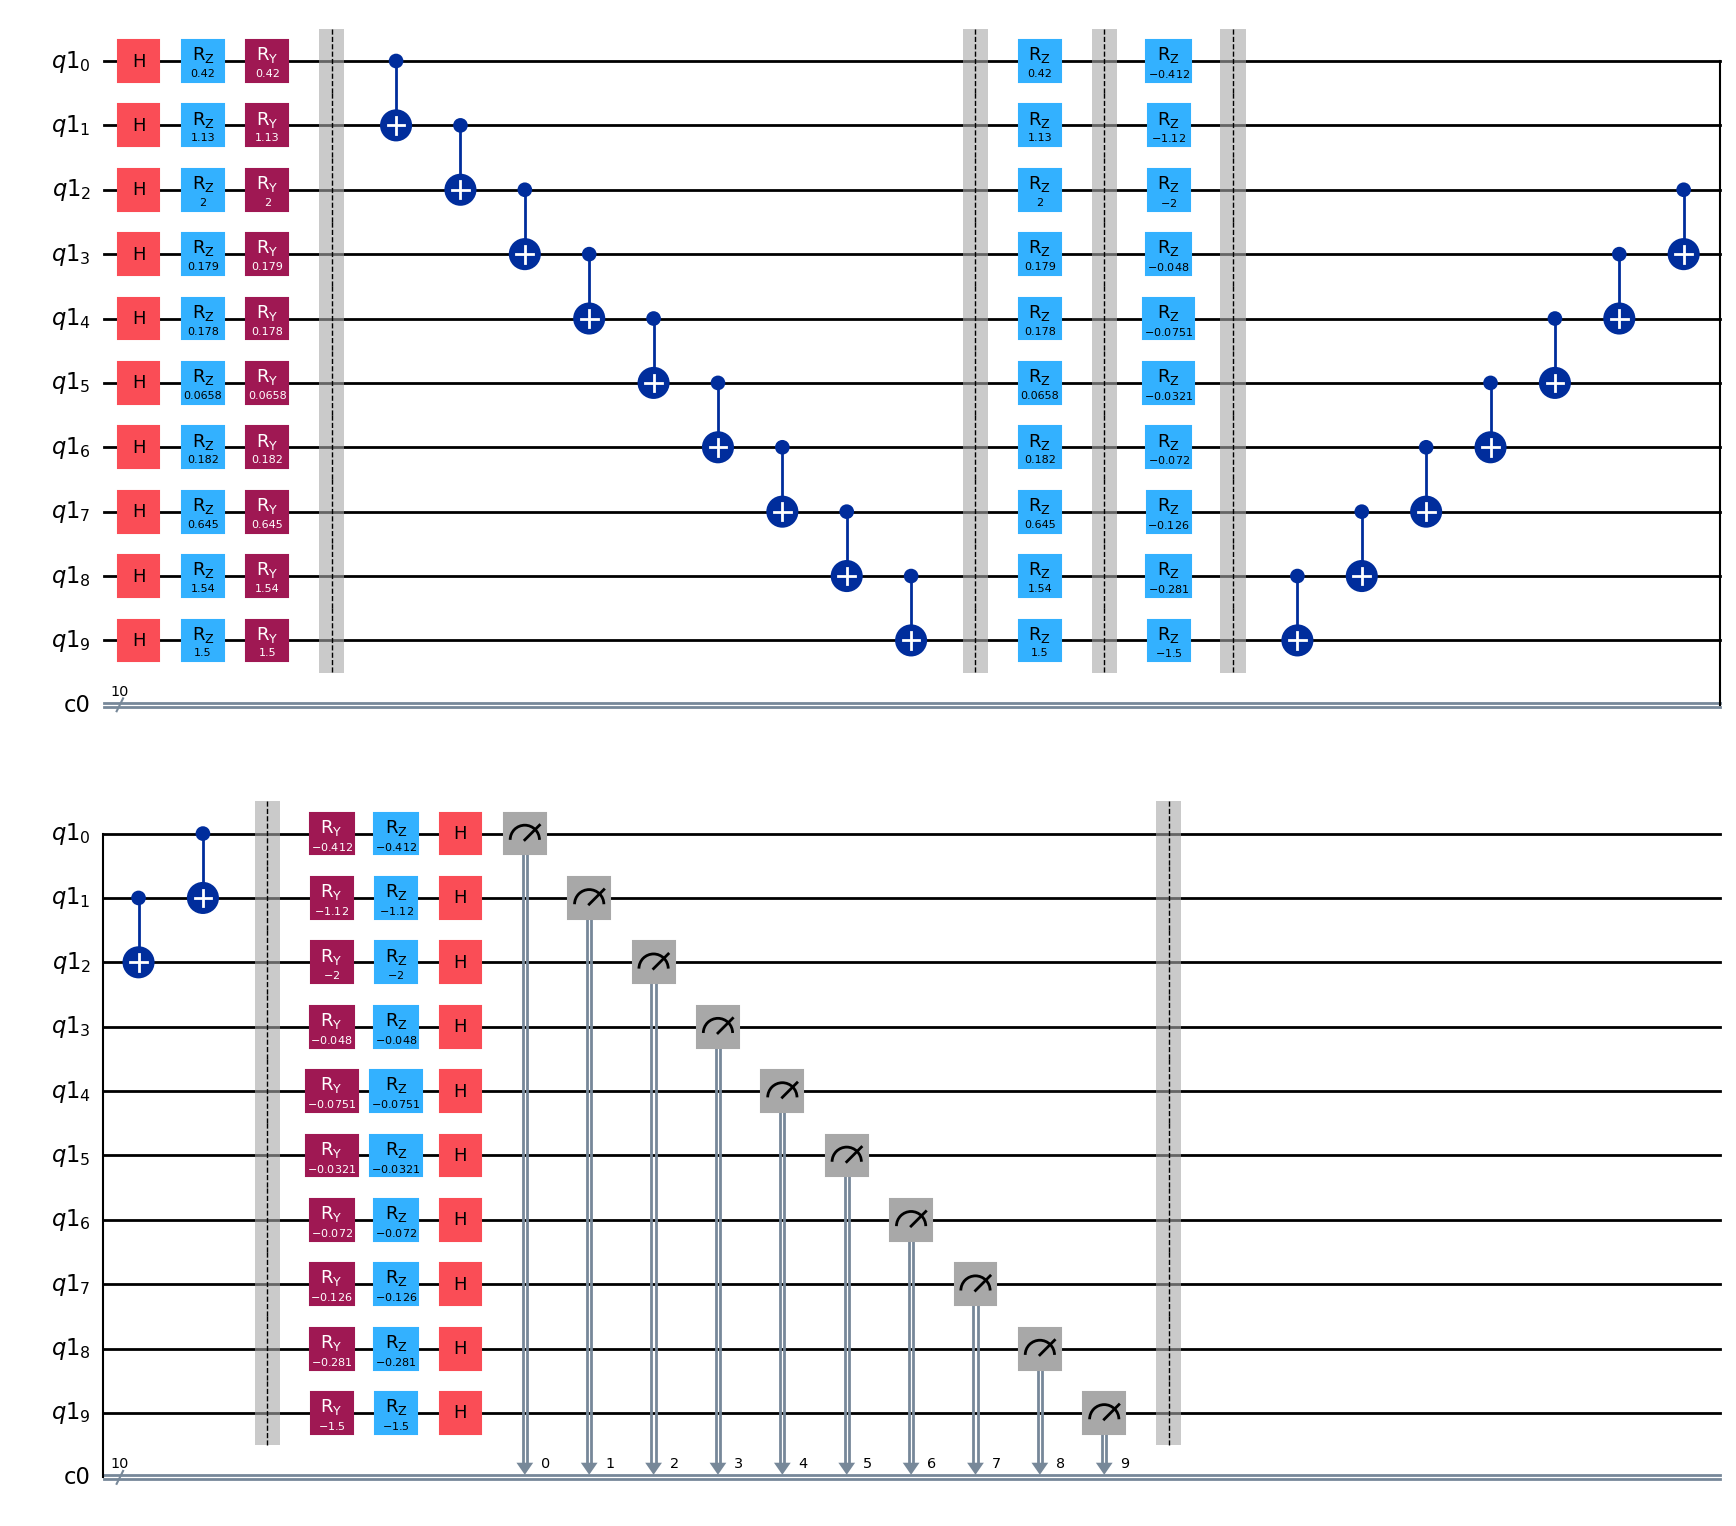

In [ ]:
data_point = features[123]
data_point2 = features[55]
qc = enhanced_feature_map(data_point, data_point2)
qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc)
job.result().get_counts()

{'0111111000': 1,
 '0111100000': 1,
 '0111110111': 2,
 '0101101100': 1,
 '0011101111': 2,
 '0000111111': 1,
 '0011111010': 5,
 '0110111111': 1,
 '0110111110': 1,
 '0000001000': 2,
 '0000100000': 1,
 '0101111100': 1,
 '0010011111': 1,
 '0011111100': 1,
 '0011111001': 2,
 '0101111010': 1,
 '0001000000': 3,
 '0001111111': 9,
 '0111111100': 1,
 '0010000000': 43,
 '0111111010': 2,
 '0111111101': 23,
 '0011111101': 15,
 '0100000000': 171,
 '0100111111': 1,
 '0101111110': 7,
 '0111111111': 119,
 '0110000000': 28,
 '0111101111': 2,
 '0001111011': 3,
 '0011111111': 67,
 '0001111101': 1,
 '0011111110': 4,
 '0110110101': 1,
 '0001111110': 2,
 '0000000001': 1,
 '0011101101': 1,
 '0000001110': 1,
 '0101000000': 2,
 '0101111101': 4,
 '0000000000': 387,
 '0010011011': 1,
 '0000011111': 1,
 '0111111001': 2,
 '0011111011': 6,
 '0111110000': 1,
 '0111111110': 21,
 '0011110011': 1,
 '0011110111': 3,
 '0000001111': 2,
 '0000010000': 1,
 '0101011111': 1,
 '0101101011': 1,
 '0101111111': 31,
 '0111111011': 

In [ ]:
house['median_house_value'].nunique()

3842

In [ ]:
house['ocean_proximity'].nunique()

5

In [ ]:
house['median_house_value'].values

array([0.90226638, 0.70824656, 0.69505074, ..., 0.15938285, 0.14371281,
       0.15340349])

In [ ]:
prices = []

for i in range(len(df['median_house_value'])):
    if df['median_house_value'][i] == 0:
        prices.append("")
    elif df['median_house_value'][i] == 1:
        prices.append('')
    else:
        prices.append('')


df['median_house_value'] = prices
print(df)

# print 123'rd element
print(df.iloc[123])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income median

In [ ]:
def feature_map(data_point):
  # encode a NEW circuit for a given datapoint.
  n_qubits = len(data_point)
  qr = QuantumRegister(n_qubits)
  cr = ClassicalRegister(n_qubits)
  qc = QuantumCircuit(qr, cr)

  for i in range(n_qubits):
    qc.h(qr[i])

  qc.barrier()

  for i in range(n_qubits):
    # set the rotation angle based on this current data.
    constant = 2 * data_point[i]
    qc.rx(constant * np.pi, qr[i])

  qc.barrier()

  for i in range(n_qubits - 1):
    qc.cx(qr[i], qr[i + 1])

  qc.draw('mpl')

  return qc

In [ ]:
def test_set(curr_set, data_point):
  pr = []
  for i, r in curr_set.iterrows():
    backend = Aer.get_backend('statevector_simulator')
    qc = enhanced_feature_map(data_point, features[i])
    job = backend.run(qc)
    result = job.result()
    statevector = result.get_statevector()
    pr.append(np.abs(statevector[0])**2)

  # return mean of pr
  return np.mean(pr)

In [ ]:
def get_accuracies(setosa, versicolor, virginica):
    # Define the correct ranges
    setosa_correct = set(range(20, 50))  # Correct range for setosa
    versicolor_correct = set(range(70, 100))  # Correct range for versicolor
    virginica_correct = set(range(130, 150))  # Correct for virginica

    setosa_actual = set(setosa)
    versicolor_actual = set(versicolor)
    virginica_actual = set(virginica)

    # Count missing points (those that should be in the set but are not)
    setosa_missing = len(setosa_correct - setosa_actual)
    versicolor_missing = len(versicolor_correct - versicolor_actual)
    virginica_missing = len(virginica_correct - virginica_actual)

    # Total classification errors
    total_errors =  setosa_missing + versicolor_missing + virginica_missing

    # Print detailed results
    print(f"Total classification errors: {total_errors}")
    final_correct = (90 - total_errors) / 90 * 100
    print(f"Classification Overall: {final_correct}%")
    return final_correct

In [ ]:
def custom_tester():
  trained_setosa = []
  trained_versicolor = []
  trained_virginica = []

  setosa_set = iris[0:19] # setosa
  versicolor_set = iris[50:69] # versicolor
  virginica_set = iris[100:119] # virginica
  set_len = 3
  test_len = 30
  train_len = 20

  for i in range(set_len):
    for j in range(test_len):
      point = i * 50 + 20 + j
      data_point = features[point]
      pr_setosa = test_set(setosa_set, data_point)
      pr_versicolor = test_set(versicolor_set, data_point)
      pr_virginica = test_set(virginica_set, data_point)
      print(f"probabilities for point {point} are {pr_setosa}, {pr_versicolor} and {pr_virginica}")

      # choose the maximum between all 3
      max_pr = max(pr_setosa, pr_versicolor, pr_virginica)
      if max_pr == pr_setosa:
        trained_setosa.append(point)
      elif max_pr == pr_versicolor:
        trained_versicolor.append(point)
      else:
        trained_virginica.append(point)

  print(f"trained setosa: {trained_setosa}")
  print(f"trained versicolor: {trained_versicolor}")
  print(f"trained virginica: {trained_virginica}")

  get_accuracies(trained_setosa, trained_versicolor, trained_virginica)

In [ ]:
# a classical test!
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # get accurary
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Kernel: {kernel}, Accuracy: {accuracy} %")

Kernel: linear, Accuracy: 96.66666666666667 %
Kernel: poly, Accuracy: 96.66666666666667 %
Kernel: rbf, Accuracy: 89.16666666666667 %
